# Método Steepest Descent

<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/ccm-2024/src/notebooks/python/steepest_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Todos los métodos de iteración requieren especificar un punto de inicio $\boldsymbol{\theta}_{0}$. En cada iteración $t$ realizan una actualización siguiendo la siguiente regla:

$$
\begin{equation}
	\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} + \rho_t \boldsymbol{d}_{t}
\end{equation}
$$

donde $\rho_t$ se le conoce como **tamaño de paso** o **tasa de aprendizaje**, y $\boldsymbol{d}_t$ es una **dirección de descenso**. 

Cuando la dirección de descenso es igual al negativo del gradiente ($\textit{i.e}$ $\boldsymbol{d}_t = - \boldsymbol{g}_t $)(Recuerda que el gradiente apunta en la dirección de máximo incremento en $f$, por eso el negativo apunta en la dirección de máxima disminución), la dirección se le conoce como de **steepest descent**.

$$
\begin{equation}
	\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho_t \boldsymbol{g}_{t}
\end{equation}
$$

Utilizando una tasa de aprendizaje constante $\rho_t = \rho$, la regla de actualización es:

$$
\begin{equation}
	\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho \boldsymbol{g}_{t}
\end{equation}
$$

Para el caso univariado, la regla de actualización es:


$$
\begin{equation}
	x_{t+1} = x_{t} - \rho f^\prime (x_{t}) 
\end{equation}
$$


## Steepest Descent en 1D

Sea la función univariada:

$$
\begin{equation}
    f(x) = 6x^2 - 12x +3
\end{equation}
$$

Graficamos la función

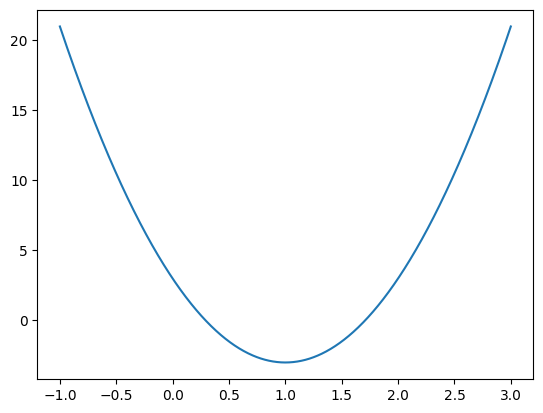

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 6*x**2 - 12*x +3

X = np.linspace(-1, 3, 1000)
y = f(X)

plt.plot(X, y)
plt.show()

Como puese verse, la función es una parábola, por lo cual tiene un mínimo local (global). 

Obtengamos el mínimo de forma analítica al obtener la derivada e igualar a cero.

$$
\begin{equation}
    \frac{d}{dx} (6x^2 - 12x +3) = 12x - 12 
\end{equation}
$$

Igualando $ 12x - 12=0$, tenemos que el mínimo es $x=1$.

Obtengamos el minimo mediante el método steepest descent.


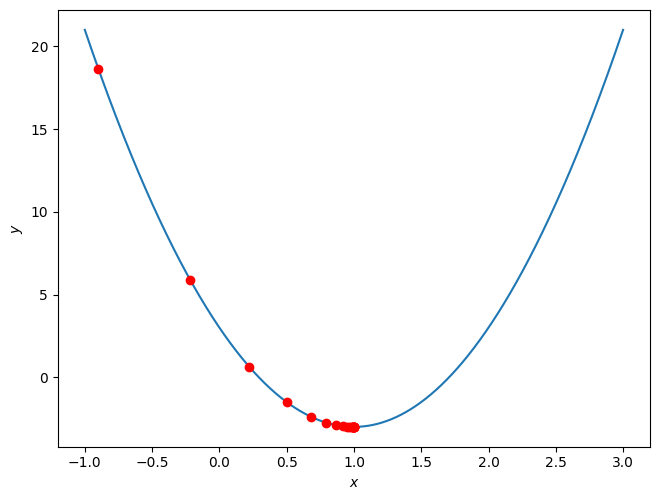

In [2]:
## Definimos la función de la primer derivada
def df(x):
    return 12*x -12

## Definimos el punto de inicio
x = -0.9

## Definimos tamaño de paso
rho = 0.03

## Definimos cantidad de iteraciones
n = 20

## Volvemos a graficar la función
plt.plot(X, y)

for it in range(20):
    plt.plot(x, f(x), marker = 'o', color = 'r')
    # Utilizamos la regla de actualización
    x = x - rho*df(x)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()


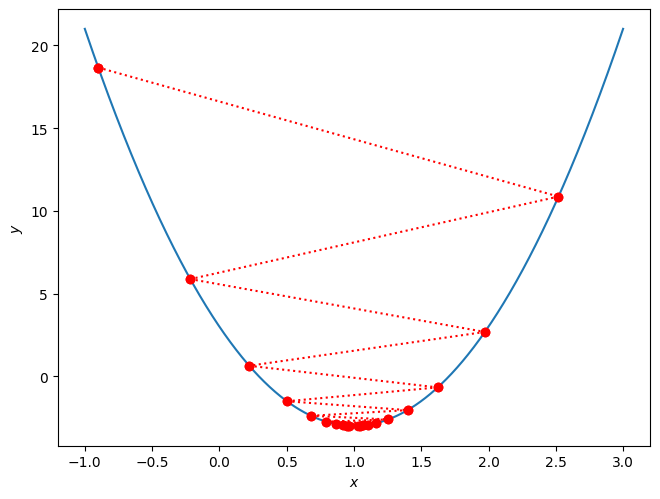

In [3]:
# Incrementamos la tasa de aprendizaje para observar una convergencia más accidentada
rho = 0.15
x = xold = -0.9

plt.plot(X, y)

for i in range(20):
    plt.plot([xold,x], [f(xold),f(x)], marker='o', linestyle='dotted', color='r')
    xold = x
    # Utilizamos la regla de actualización
    x = x - rho * df(x)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)

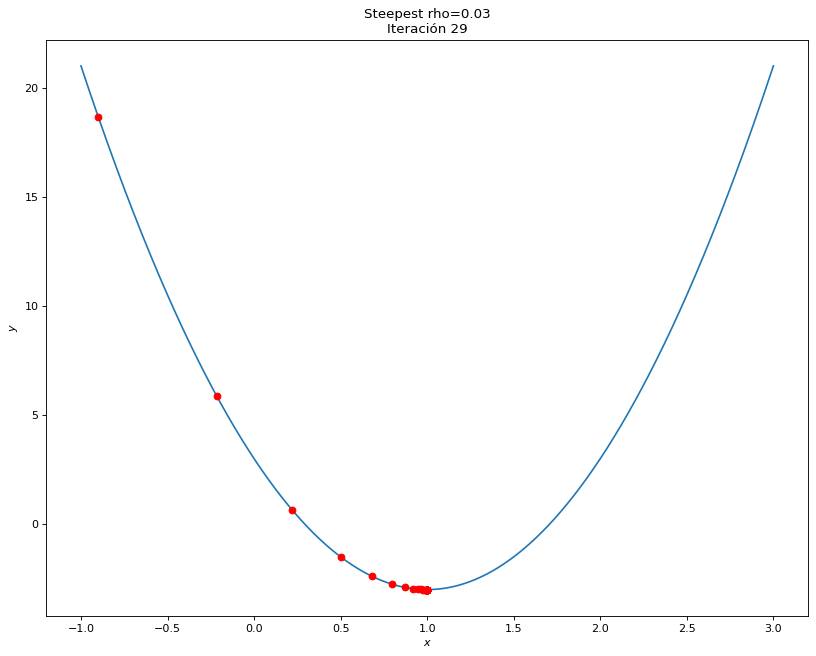

In [4]:
## Hagamos un giff para verificar la convergencia de las corridas
import os

# Creamos una carpeta para guardas las imágenes
if not os.path.isdir('rho_003'):
    os.makedirs("rho_003")

## Definimos el punto de inicio
x = -0.9

## Definimos tamaño de paso
rho = 0.03

## Definimos cantidad de iteraciones
n = 30

## La siguiente lista tendrá los nombres de las imágenes
pics = []

## Volvemos a graficar la función
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(X, y)

for it in range(n):
    plt.plot(x, f(x), marker = 'o', color = 'r')
    
    # Utilizamos la regla de actualización
    x = x - rho*df(x)
    plt.title(f"Steepest rho={rho}\nIteración {it}")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    
    file_name = f"rho_003_steepest_it_{it}.png"
    plt.savefig(os.path.join("rho_003",file_name))
    pics.append(os.path.join("rho_003",file_name))
    
from PIL import Image


frames = [Image.open(image) for image in pics]
frame_one = frames[0]
frame_one.save("rho_003_steepest.gif", format="GIF", append_images=frames,
            save_all=True, duration=350, loop=0)


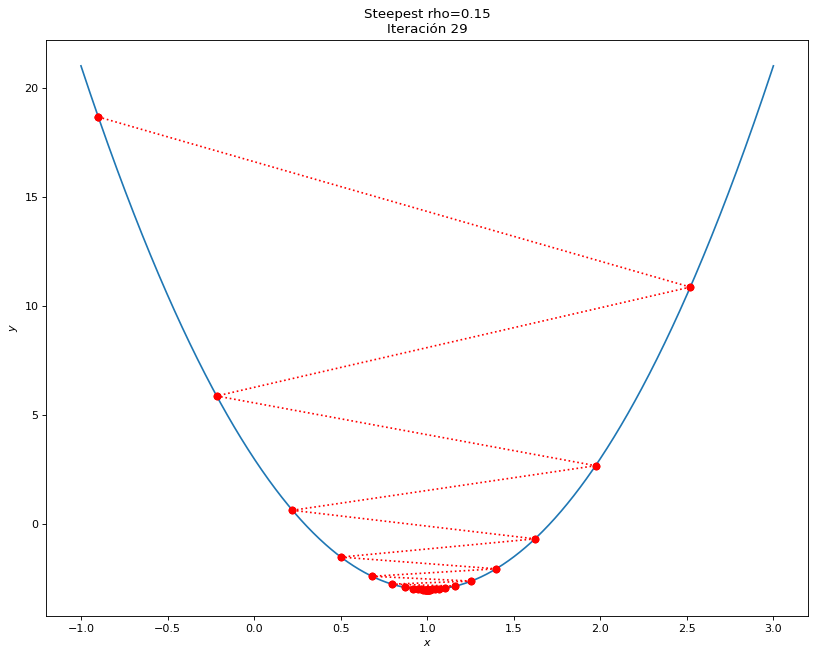

In [5]:
## Hagamos un giff para verificar la convergencia de las corridas

# Creamos una carpeta para guardas las imágenes
if not os.path.isdir('rho_015'):
    os.makedirs("rho_015")

## Definimos el punto de inicio
x = xold = -0.9

## Definimos tamaño de paso
rho = 0.15

## Definimos cantidad de iteraciones
n = 30

## La siguiente lista tendrá los nombres de las imágenes
pics = []

## Volvemos a graficar la función
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(X, y)

for it in range(n):
    plt.plot([xold,x], [f(xold),f(x)], marker='o', linestyle='dotted', color='r')
    xold = x
    # Utilizamos la regla de actualización
    x = x - rho*df(x)
    plt.title(f"Steepest rho={rho}\nIteración {it}")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    
    file_name = f"rho_015_steepest_it_{it}.png"
    plt.savefig(os.path.join("rho_015",file_name))
    pics.append(os.path.join("rho_015",file_name))
    
from PIL import Image


frames = [Image.open(image) for image in pics]
frame_one = frames[0]
frame_one.save("rho_015_steepest.gif", format="GIF", append_images=frames,
            save_all=True, duration=350, loop=0)

## Steepest Descent en 2D

Sea la función que recibe dos argumentos:

$$
    \begin{equation}
        f(x,y) = 6x^2 + 9y^2 - 12x -14y +3
    \end{equation}
$$

Obtenemos el gradiente:


$$
\nabla f(x,y)=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{bmatrix} =
 \begin{bmatrix}
12x -12 \\
18y -14
\end{bmatrix} 
$$



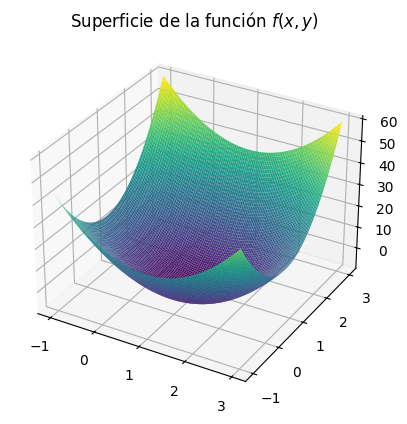

In [6]:
#  Gradient descent steps
from mpl_toolkits.mplot3d import Axes3D 

#  Function and partial derivatives
def f(x,y):
    return 6*x**2 + 9*y**2 - 12*x - 14*y + 3

N = 100
X,Y = np.meshgrid(np.linspace(-1,3,N), np.linspace(-1,3,N))
Z = f(X,Y)

# Graficamos la superficie de la función
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la función $f(x,y)$');


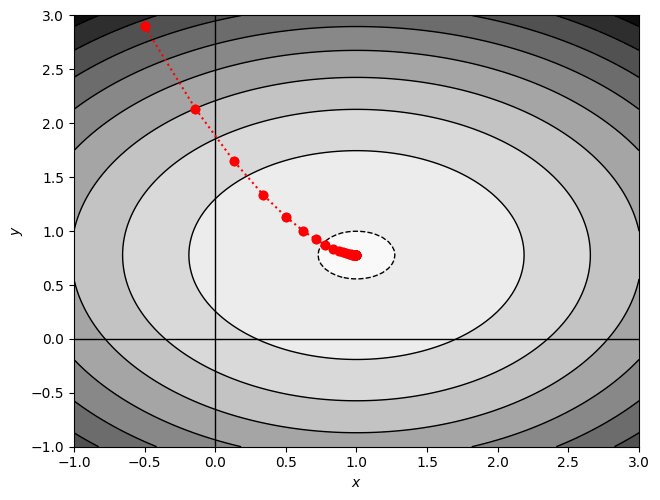

In [7]:
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.7777778,color='k',marker='+')

# La función del gradiente 
def gradiente(X):
    x, y = X
    dx = 12*x - 12
    dy = 18*y - 14
    return np.array([dx,dy])

# Modificamos la función multivariada
def f(X):
    x,y = X
    return 6*x**2 + 9*y**2 - 12*x - 14*y + 3

## Utilizamos el método para la función multivariada
x = xold = -0.5
y = yold = 2.9

# Tasa de aprendizaje
rho = 0.02

# Vector inicial
X_vec = np.array([x,y])

n = 30 

for i in range(n):
    plt.plot([xold,x],[yold,y], marker='o', linestyle='dotted', color='red')
    xold = x
    yold = y
    
    # Utilizamos la regla de actualización
    X_vec = X_vec - rho*gradiente(X_vec)
    x, y = X_vec

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

### Cambiemos la tasa de aprendizaje y la forma de la función

La nueva función es:

$$
    \begin{equation}
        f(x,y) = 6x^2 + 40y^2 - 12x -30y +3
    \end{equation}
$$

Obtenemos el gradiente:


$$
\nabla f(x,y)=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{bmatrix} =
 \begin{bmatrix}
12x -12 \\
80y -30
\end{bmatrix} 
$$

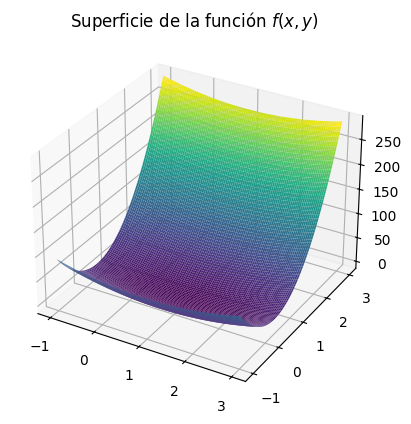

In [8]:
def f(x,y):
    return 6*x**2 + 40*y**2 - 12*x - 30*y + 3

N = 100
X,Y = np.meshgrid(np.linspace(-1,3,N), np.linspace(-1,3,N))
Z = f(X,Y)

# Graficamos la superficie de la función
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la función $f(x,y)$');

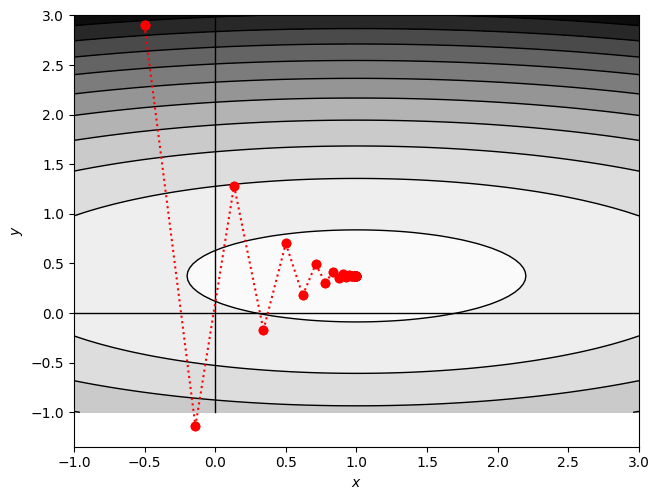

In [9]:
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')

# La función del gradiente 
def gradiente(X):
    x, y = X
    dx = 12*x - 12
    dy = 80*y - 30
    return np.array([dx,dy])

# Modificamos la función multivariada
def f(X):
    x,y = X
    return 6*x**2 + 40*y**2 - 12*x - 30*y + 3

## Utilizamos el método para la función multivariada
x = xold = -0.5
y = yold = 2.9

# Tasa de aprendizaje
rho = 0.02

# Vector inicial
X_vec = np.array([x,y])

n = 30 

for i in range(n):
    plt.plot([xold,x],[yold,y], marker='o', linestyle='dotted', color='red')
    xold = x
    yold = y    
    
    # Utilizamos la regla de actualización
    X_vec = X_vec - rho*gradiente(X_vec)
    x, y = X_vec

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

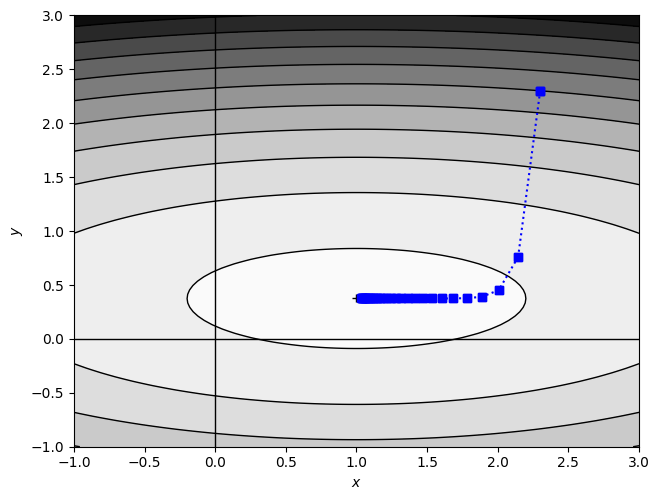

In [10]:
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')


## Utilizamos el método para la función multivariada
x = xold = 2.3
y = yold = 2.3

# Tasa de aprendizaje
rho = 0.01

# Vector inicial
X_vec = np.array([x,y])

n = 30 

for i in range(n):
    plt.plot([xold,x],[yold,y], marker='s', linestyle='dotted', color='blue')
    xold = x
    yold = y    
    
    # Utilizamos la regla de actualización
    X_vec = X_vec - rho*gradiente(X_vec)
    x, y = X_vec

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

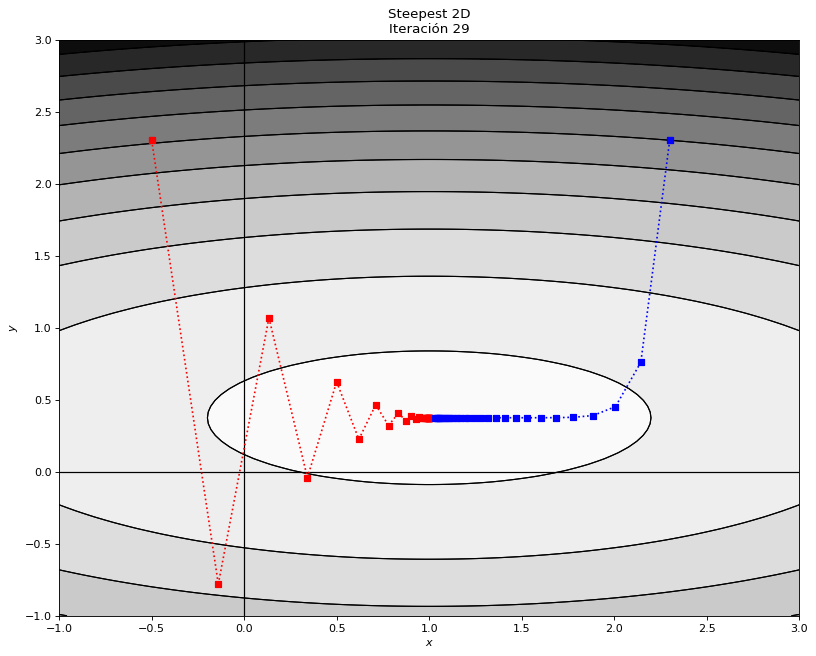

In [11]:
## Hagamos un giff para verificar la convergencia de las corridas

plt.figure(figsize=(10, 8), dpi=80)
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')

# Creamos una carpeta para guardas las imágenes
if not os.path.isdir('steepest_2D'):
    os.makedirs("steepest_2D")


## Definimos cantidad de iteraciones
n = 30

## La siguiente lista tendrá los nombres de las imágenes
pics = []

## Volvemos a graficar la función
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')


## Definimos los vectores de inicio
x_rho_002 = xold_rho_002 = -0.5
y_rho_002 = yold_rho_002 = 2.3

x_rho_001 = xold_rho_001 = 2.3
y_rho_001 = yold_rho_001 = 2.3

X_vec_rho_002 = np.array([x_rho_002,y_rho_002])
X_vec_rho_001 = np.array([x_rho_001,y_rho_001])

# Tasas de aprendizaje
rho_001 = 0.01
rho_002 = 0.02 

for it in range(n):
    plt.plot([xold_rho_002,x_rho_002],[yold_rho_002,y_rho_002], marker='s', linestyle='dotted', color='red')
    plt.plot([xold_rho_001,x_rho_001],[yold_rho_001,y_rho_001], marker='s', linestyle='dotted', color='blue')

    xold_rho_001 = x_rho_001
    yold_rho_001 = y_rho_001
    
    xold_rho_002 = x_rho_002
    yold_rho_002 = y_rho_002
    
    # Utilizamos la regla de actualización
    X_vec_rho_002 = X_vec_rho_002 - rho_002*gradiente(X_vec_rho_002)
    x_rho_002, y_rho_002 = X_vec_rho_002

    X_vec_rho_001 = X_vec_rho_001 - rho_001*gradiente(X_vec_rho_001)
    x_rho_001, y_rho_001 = X_vec_rho_001

    plt.title(f"Steepest 2D\nIteración {it}")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    
    file_name = f"steepest_2D_it_{it}.png"
    plt.savefig(os.path.join("steepest_2D",file_name))
    pics.append(os.path.join("steepest_2D",file_name))
    
from PIL import Image


frames = [Image.open(image) for image in pics]
frame_one = frames[0]
frame_one.save("2D_steepest.gif", format="GIF", append_images=frames,
            save_all=True, duration=350, loop=0)

## Método de Newton

El método de Newton usa el gradiente e incorporan información sobre la curvatura de la función mediante la matriz Hessiana, ayudando a tener una convergencia más rápida.

En cada iteración $t$ realizan una actualización siguiendo la siguiente regla:

$$
\begin{equation}
	\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} -   \rho \mathbf{H}_t^{-1}\mathbf{g}_{t}
\end{equation}
$$

donde $\mathbf{H}_t^{-1}$ es la matriz Hessiana evaluada en $\boldsymbol{\theta}_{t} $.

Usemos la misma función que en el ejemplo anterior:

$$
    \begin{equation}
        f(x,y) = 6x^2 + 40y^2 - 12x -30y +3
    \end{equation}
$$

Obtenemos el gradiente:


$$
\nabla f(x,y)=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{bmatrix} =
 \begin{bmatrix}
12x -12 \\
80y -30
\end{bmatrix} 
$$

La matrix Hessiana es:

$$
\nabla^2 f(x,y) = H=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x\partial x} & \frac{\partial f(x,y)}{\partial x\partial y} \\
\frac{\partial f(x,y)}{\partial y\partial x} & \frac{\partial f(x,y)}{\partial y\partial y}
\end{bmatrix} =
 \begin{bmatrix}
12 & 0 \\
0 & 80
\end{bmatrix} 
$$


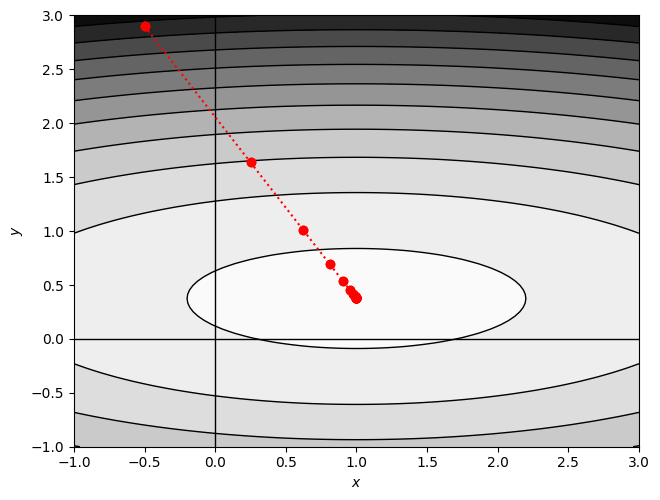

In [12]:
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')

# La función del gradiente 
def gradiente(X):
    x, y = X
    dx = 12*x - 12
    dy = 80*y - 30
    return np.array([dx,dy])

# La matriz Hessiana es
H = np.array([
    [12, 0],
    [0, 80]
])

# La matriz inversa es
H_inv = np.linalg.inv(H)

# Modificamos la función multivariada
def f(X):
    x,y = X
    return 6*x**2 + 40*y**2 - 12*x - 30*y + 3

## Utilizamos el método para la función multivariada
x = xold = -0.5
y = yold = 2.9

# Tasa de aprendizaje
rho = 0.5

# Vector inicial
X_vec = np.array([x,y])

n = 30 

for i in range(n):
    plt.plot([xold,x],[yold,y], marker='o', linestyle='dotted', color='red')
    xold = x
    yold = y    
    
    # Utilizamos la regla de actualización
    X_vec = X_vec - rho* H_inv @ gradiente(X_vec)
    x, y = X_vec

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

## Comparemos la convergencia de los tres métodos

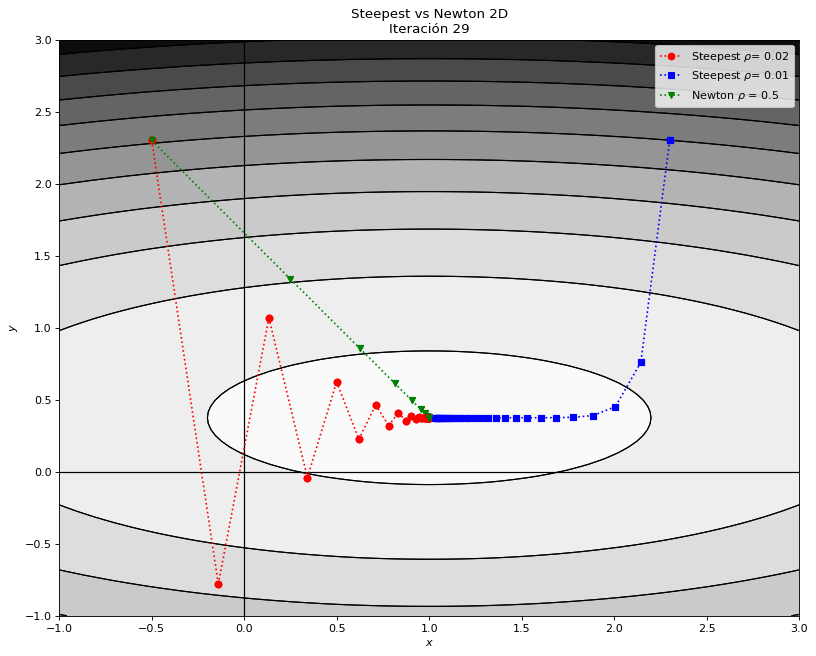

In [13]:
## Hagamos un giff para verificar la convergencia de las corridas

plt.figure(figsize=(10, 8), dpi=80)
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')

# Creamos una carpeta para guardas las imágenes
if not os.path.isdir('steepest_newton_2D'):
    os.makedirs("steepest_newton_2D")


## Definimos cantidad de iteraciones
n = 30

## La siguiente lista tendrá los nombres de las imágenes
pics = []

## Volvemos a graficar la función
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')


## Definimos los vectores de inicio
x_rho_002 = xold_rho_002 = -0.5
y_rho_002 = yold_rho_002 = 2.3

x_rho_001 = xold_rho_001 = 2.3
y_rho_001 = yold_rho_001 = 2.3

x_newton = xold_newton = -0.5
y_newton = yold_newton = 2.3

X_vec_rho_002 = np.array([x_rho_002,y_rho_002])
X_vec_rho_001 = np.array([x_rho_001,y_rho_001])
X_vec_newton = np.array([x_newton,y_newton])


# Tasas de aprendizaje
rho_001 = 0.01
rho_002 = 0.02 
rho_newton = 0.5 

for it in range(n):
    plt.plot([xold_rho_002,x_rho_002],[yold_rho_002,y_rho_002], marker='o', linestyle='dotted', color='red', label = r"Steepest $\rho$= 0.02")
    plt.plot([xold_rho_001,x_rho_001],[yold_rho_001,y_rho_001], marker='s', linestyle='dotted', color='blue', label = r"Steepest $\rho$= 0.01")
    plt.plot([xold_newton,x_newton],[yold_newton,y_newton], marker='v', linestyle='dotted', color='green', label = r"Newton $\rho$ = 0.5  ")

    xold_rho_001 = x_rho_001
    yold_rho_001 = y_rho_001
    
    xold_rho_002 = x_rho_002
    yold_rho_002 = y_rho_002

    xold_newton = x_newton
    yold_newton = y_newton

    ## Utilizamos la regla de actualización
    
    # Steepest descent
    X_vec_rho_002 = X_vec_rho_002 - rho_002*gradiente(X_vec_rho_002)
    x_rho_002, y_rho_002 = X_vec_rho_002

    X_vec_rho_001 = X_vec_rho_001 - rho_001*gradiente(X_vec_rho_001)
    x_rho_001, y_rho_001 = X_vec_rho_001
    
    # Newton
    X_vec_newton = X_vec_newton - rho_newton*H_inv @ gradiente(X_vec_newton)
    x_newton, y_newton = X_vec_newton

    plt.title(f"Steepest vs Newton 2D\nIteración {it}")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    
    if it ==0:
        plt.legend()
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    
    file_name = f"steepest_newton_2D_it_{it}.png"
    plt.savefig(os.path.join("steepest_newton_2D",file_name))
    pics.append(os.path.join("steepest_newton_2D",file_name))
    
from PIL import Image


frames = [Image.open(image) for image in pics]
frame_one = frames[0]
frame_one.save("2D_steepest_newton.gif", format="GIF", append_images=frames,
            save_all=True, duration=350, loop=0)

# Métodos de *momentum*

## Método estándar

Sí agregamos el término de *momentum* $\boldsymbol{m_t}$ al método de steepest descent el cuál tiene por ecuación de actualización
    $$
	\begin{equation}
		\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho \boldsymbol{g}_{t}
	\end{equation}
	$$
El *momentum* es incorporado de la siguiente manera:
    $$
     \begin{equation}
		\boldsymbol{m}_{t+1} = \beta\boldsymbol{m}_{t} - \boldsymbol{g}_{t}
	\end{equation}
    $$	
    $$
     \begin{equation}
		\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho \boldsymbol{m}_{t+1}
	\end{equation}
    $$
Un valor típico de $\beta$ es 0.9. Para $\beta=0$, el método se reduce a steepest descent. Podemos pensar$\beta$ como un factor de escala o e intensidad de inercia. Inicialmente, $\boldsymbol{m}_{t}=0$.

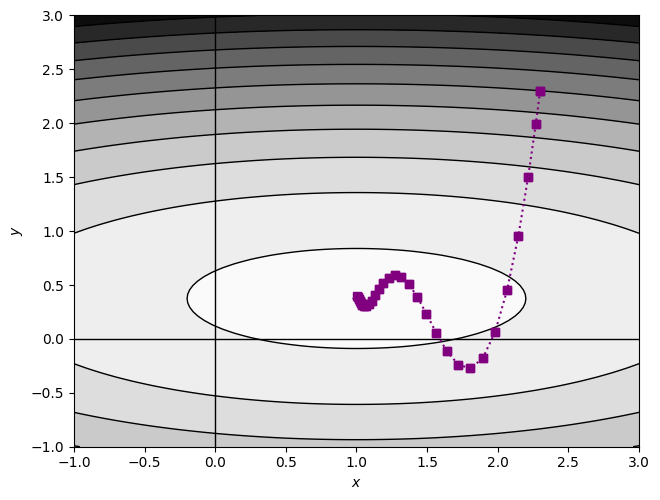

In [14]:
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')


## Utilizamos el método para la función multivariada
x = xold = 2.3
y = yold = 2.3

# Tasa de aprendizaje
rho = 0.002

# Factor de escala (inercia)
beta = 0.75

# Inicialmente el momentum es igual a 0
m = np.zeros(2)

# Vector inicial
X_vec = np.array([x,y])

n = 30 

for i in range(n):
    plt.plot([xold,x],[yold,y], marker='s', linestyle='dotted', color='purple')
    xold = x
    yold = y    
    
    # Utilizamos la regla de actualización
    m = beta*m + gradiente(X_vec)
    X_vec = X_vec - rho*m
    x, y = X_vec

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

## Método de Nesterov

El método de Nesterov  definido en el formato estándar de *momentum* es el siguiente:
    $$
	\begin{equation}
		\boldsymbol{m}_{t+1} = \beta\boldsymbol{m}_{t} - \rho\nabla f(\boldsymbol{\theta}_{t} + \beta \boldsymbol{m}_{t})
	\end{equation}
    $$
    $$
     \begin{equation}
		\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} + \boldsymbol{m}_{t+1}
	\end{equation}
    $$

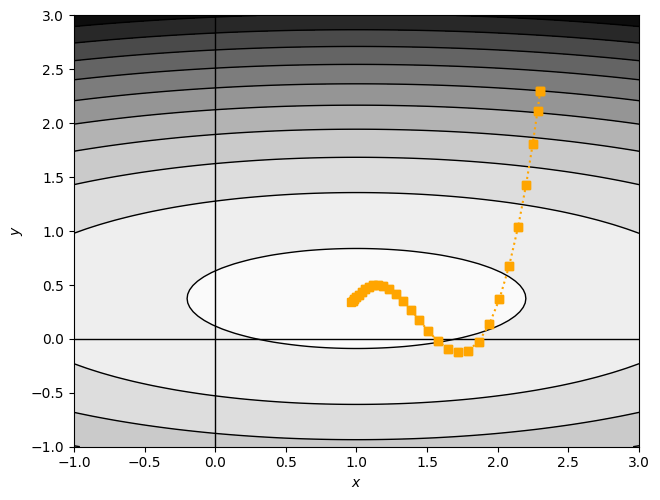

In [15]:
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')


## Utilizamos el método para la función multivariada
x = xold = 2.3
y = yold = 2.3

# Tasa de aprendizaje
rho = 0.0012

# Factor de escala (inercia)
beta = 0.85

# Inicialmente el momentum es igual a 0
m = np.zeros(2)

# Vector inicial
X_vec = np.array([x,y])

n = 30 

for i in range(n):
    plt.plot([xold,x],[yold,y], marker='s', linestyle='dotted', color='orange')
    xold = x
    yold = y    
    
    # Utilizamos la regla de actualización
    m = beta*m - rho*gradiente(X_vec + beta*m)
    X_vec = X_vec + m
    x, y = X_vec

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

## Comparemos la convergencia de los cinco métodos

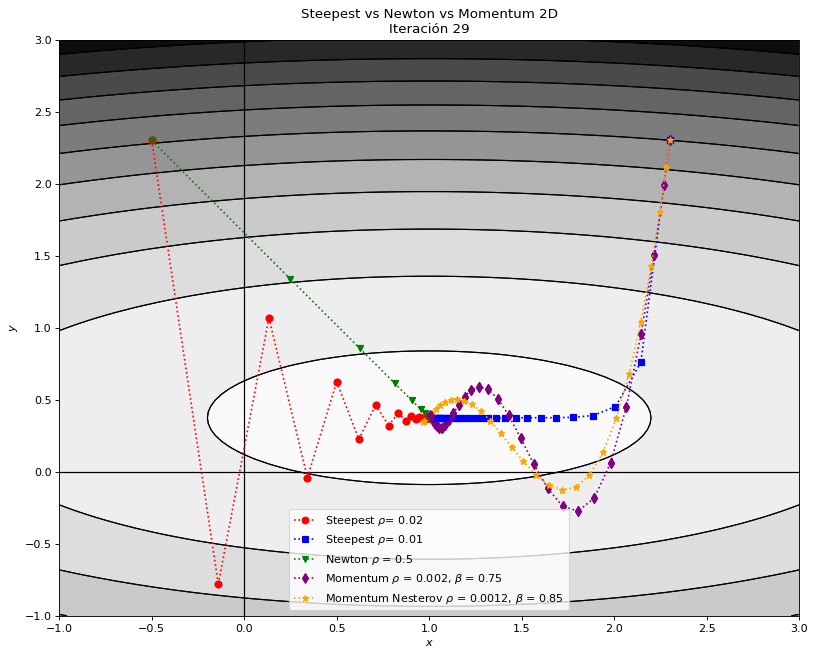

In [16]:
## Hagamos un giff para verificar la convergencia de las corridas

plt.figure(figsize=(10, 8), dpi=80)
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')

# Creamos una carpeta para guardas las imágenes
if not os.path.isdir('steepest_newton_2D_momentum'):
    os.makedirs("steepest_newton_2D_momentum")


## Definimos cantidad de iteraciones
n = 30

## La siguiente lista tendrá los nombres de las imágenes
pics = []

## Volvemos a graficar la función
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')


## Definimos los vectores de inicio
x_rho_002 = xold_rho_002 = -0.5
y_rho_002 = yold_rho_002 = 2.3

x_rho_001 = xold_rho_001 = 2.3
y_rho_001 = yold_rho_001 = 2.3

x_newton = xold_newton = -0.5
y_newton = yold_newton = 2.3

x_momentum = xold_momentum = 2.3
y_momentum = yold_momentum = 2.3

x_momentum_nesterov = xold_momentum_nesterov = 2.3
y_momentum_nesterov = yold_momentum_nesterov = 2.3

X_vec_rho_002 = np.array([x_rho_002,y_rho_002])
X_vec_rho_001 = np.array([x_rho_001,y_rho_001])
X_vec_newton = np.array([x_newton,y_newton])
X_vec_momentum = np.array([x_momentum,y_momentum])
X_vec_momentum_nesterov = np.array([x_momentum_nesterov,y_momentum_nesterov])


# Tasas de aprendizaje
rho_001 = 0.01
rho_002 = 0.02 
rho_newton = 0.5 
rho_momentum = 0.002
rho_momentum_nesterov = 0.0012

# Factor de escala, métodos de momentum
beta_momentum = 0.75
beta_momentum_nesterov = 0.85

# Momentums iniciales
m_momentum = np.zeros(2)
m_momentum_nesterov = np.zeros(2)

for it in range(n):
    plt.plot([xold_rho_002,x_rho_002],[yold_rho_002,y_rho_002], marker='o', linestyle='dotted', color='red', label = r"Steepest $\rho$= 0.02")
    plt.plot([xold_rho_001,x_rho_001],[yold_rho_001,y_rho_001], marker='s', linestyle='dotted', color='blue', label = r"Steepest $\rho$= 0.01")
    plt.plot([xold_newton,x_newton],[yold_newton,y_newton], marker='v', linestyle='dotted', color='green', label = r"Newton $\rho$ = 0.5  ")
    plt.plot([xold_momentum,x_momentum],[yold_momentum,y_momentum], marker='d', linestyle='dotted', color='purple', label = r"Momentum $\rho$ = 0.002, $\beta$ = 0.75")
    plt.plot([xold_momentum_nesterov,x_momentum_nesterov],[yold_momentum_nesterov,y_momentum_nesterov], marker='*', linestyle='dotted', color='orange', label = r"Momentum Nesterov $\rho$ = 0.0012, $\beta$ = 0.85 ")

    xold_rho_001 = x_rho_001
    yold_rho_001 = y_rho_001
    
    xold_rho_002 = x_rho_002
    yold_rho_002 = y_rho_002

    xold_newton = x_newton
    yold_newton = y_newton

    xold_momentum = x_momentum
    yold_momentum = y_momentum

    xold_momentum_nesterov = x_momentum_nesterov
    yold_momentum_nesterov = y_momentum_nesterov
    
    ## Utilizamos la regla de actualización
    
    # Steepest descent
    X_vec_rho_002 = X_vec_rho_002 - rho_002*gradiente(X_vec_rho_002)
    x_rho_002, y_rho_002 = X_vec_rho_002

    X_vec_rho_001 = X_vec_rho_001 - rho_001*gradiente(X_vec_rho_001)
    x_rho_001, y_rho_001 = X_vec_rho_001
    
    # Newton
    X_vec_newton = X_vec_newton - rho_newton*H_inv @ gradiente(X_vec_newton)
    x_newton, y_newton = X_vec_newton

    # Momentum
    m_momentum = beta_momentum*m_momentum + gradiente(X_vec_momentum)
    X_vec_momentum = X_vec_momentum - rho_momentum*m_momentum
    x_momentum, y_momentum = X_vec_momentum

    # Nesterov momentum
    m_momentum_nesterov = beta_momentum_nesterov*m_momentum_nesterov - rho_momentum_nesterov*gradiente(X_vec_momentum_nesterov + beta_momentum_nesterov*m_momentum_nesterov)
    X_vec_momentum_nesterov = X_vec_momentum_nesterov + m_momentum_nesterov
    x_momentum_nesterov, y_momentum_nesterov = X_vec_momentum_nesterov

    plt.title(f"Steepest vs Newton vs Momentum 2D\nIteración {it}")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    
    if it ==0:
        plt.legend()
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    
    file_name = f"steepest_newton_momentum_2D_it_{it}.png"
    plt.savefig(os.path.join("steepest_newton_2D_momentum",file_name))
    pics.append(os.path.join("steepest_newton_2D_momentum",file_name))
    
from PIL import Image


frames = [Image.open(image) for image in pics]
frame_one = frames[0]
frame_one.save("2D_steepest_newton_momentum.gif", format="GIF", append_images=frames,
            save_all=True, duration=350, loop=0)

## Adam

Kigma y Ba (2014) propusieron el método *Adam* (Adaptative moment estimation). El método usa el cuadrado del gradiente así como un término de *momentum*. Las reglas de actualización son las siguientes:
    $$
	\begin{gather*} 
		\boldsymbol{m}_t = \beta_1 \boldsymbol{m}_{t-1} + \beta_1 (1-\beta_1)\boldsymbol{g}_t \\
		\boldsymbol{s}_t = \beta_2 \boldsymbol{s}_{t-1} + \beta_2 (1-\beta_1)\boldsymbol{g}^2_t \\
		\boldsymbol{\tilde{m}}_t = \dfrac{\boldsymbol{m}_t }{1-\beta^t_1}\\
		\boldsymbol{\tilde{s}}_t = \dfrac{\boldsymbol{s}_t }{1-\beta^t_2}\\
		\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_{t} - \rho \dfrac{1}{\sqrt{\boldsymbol{\tilde{s}}_t} + \epsilon} \boldsymbol{\tilde{m}}_t
	\end{gather*}
    $$
    
Los valores estándar de los parámetros son $\beta_1=0.9$, $\beta_2=0.999$ y $\epsilon=10^{-6}$. Si definimos $\beta_1=0$ y quitamos la corrección del sesgo, obtenemos el método RMSprop (Hinton, et al., 2012) que no utiliza *momentum*. 
Se suele utilizar una tasa de aprendizaje constante igual a $\rho=0.001$.


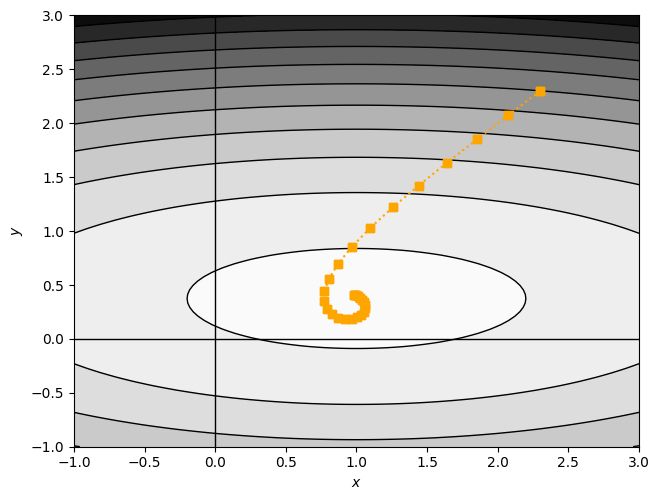

In [17]:
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')


## Utilizamos el método para la función multivariada
x = xold = 2.3
y = yold = 2.3

# Tasa de aprendizaje
rho = 0.3

# Factor de escala 
beta_uno = 0.75
beta_dos = 0.999
epsilon = 10**-6

# Inicialmente el momentum es igual a 0
m = np.zeros(2)
s = np.zeros(2)

# Vector inicial
X_vec = np.array([x,y])

n = 30 

for i in range(n):
    plt.plot([xold,x],[yold,y], marker='s', linestyle='dotted', color='orange')
    xold = x
    yold = y    
    
    # Utilizamos la regla de actualización
    m = beta_uno*m + beta_uno*(1-beta_uno)*gradiente(X_vec)
    s = beta_dos*s + beta_dos*(1-beta_dos)*gradiente(X_vec)**2

    
    m_tilde = m/(1 - (beta_uno**(i+1) ))
    s_tilde = s/(1 - (beta_dos**(i+1) ))

    X_vec = X_vec - rho*(1/(np.sqrt(s_tilde) + epsilon))*m_tilde
    x, y = X_vec


    

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

 ## Comparemos la convergencia de los seis métodos

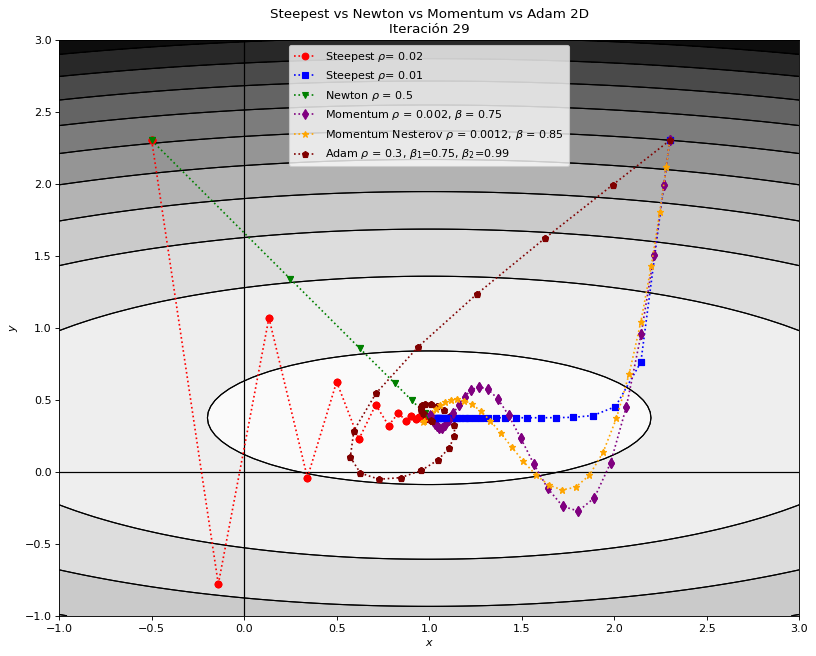

In [18]:
## Hagamos un giff para verificar la convergencia de las corridas

plt.figure(figsize=(10, 8), dpi=80)
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')

# Creamos una carpeta para guardas las imágenes
if not os.path.isdir('steepest_newton_2D_momentum_adam'):
    os.makedirs("steepest_newton_2D_momentum_adam")


## Definimos cantidad de iteraciones
n = 30

## La siguiente lista tendrá los nombres de las imágenes
pics = []

## Volvemos a graficar la función
plt.contourf(X,Y,Z,10, cmap="Greys")
plt.contour(X,Y,Z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')


## Definimos los vectores de inicio
x_rho_002 = xold_rho_002 = -0.5
y_rho_002 = yold_rho_002 = 2.3

x_rho_001 = xold_rho_001 = 2.3
y_rho_001 = yold_rho_001 = 2.3

x_newton = xold_newton = -0.5
y_newton = yold_newton = 2.3

x_momentum = xold_momentum = 2.3
y_momentum = yold_momentum = 2.3

x_momentum_nesterov = xold_momentum_nesterov = 2.3
y_momentum_nesterov = yold_momentum_nesterov = 2.3

x_adam = xold_adam = 2.3
y_adam = yold_adam = 2.3

X_vec_rho_002 = np.array([x_rho_002,y_rho_002])
X_vec_rho_001 = np.array([x_rho_001,y_rho_001])
X_vec_newton = np.array([x_newton,y_newton])
X_vec_momentum = np.array([x_momentum,y_momentum])
X_vec_momentum_nesterov = np.array([x_momentum_nesterov,y_momentum_nesterov])
X_vec_adam = np.array([x_adam,y_adam])
X_vec_adam = np.array([x_adam,y_adam])

# Tasas de aprendizaje
rho_001 = 0.01
rho_002 = 0.02 
rho_newton = 0.5 
rho_momentum = 0.002
rho_momentum_nesterov = 0.0012
rho_adam = 0.3

# Factor de escala, métodos de momentum
beta_momentum = 0.75
beta_momentum_nesterov = 0.85
beta_adam_uno = 0.75
beta_adam_dos = 0.999
epsilon_adam = 10**-6

# Momentums iniciales
m_momentum = np.zeros(2)
m_momentum_nesterov = np.zeros(2)
m_adam = np.zeros(2)
s_adam = np.zeros(2)

for it in range(n):
    plt.plot([xold_rho_002,x_rho_002],[yold_rho_002,y_rho_002], marker='o', linestyle='dotted', color='red', label = r"Steepest $\rho$= 0.02")
    plt.plot([xold_rho_001,x_rho_001],[yold_rho_001,y_rho_001], marker='s', linestyle='dotted', color='blue', label = r"Steepest $\rho$= 0.01")
    plt.plot([xold_newton,x_newton],[yold_newton,y_newton], marker='v', linestyle='dotted', color='green', label = r"Newton $\rho$ = 0.5  ")
    plt.plot([xold_momentum,x_momentum],[yold_momentum,y_momentum], marker='d', linestyle='dotted', color='purple', label = r"Momentum $\rho$ = 0.002, $\beta$ = 0.75")
    plt.plot([xold_momentum_nesterov,x_momentum_nesterov],[yold_momentum_nesterov,y_momentum_nesterov], marker='*', linestyle='dotted', color='orange', label = r"Momentum Nesterov $\rho$ = 0.0012, $\beta$ = 0.85 ")
    plt.plot([xold_adam,x_adam],[yold_adam,y_adam], marker='p', linestyle='dotted', color='maroon', label = r"Adam $\rho$ = 0.3, $\beta_1$=0.75, $\beta_2$=0.99  ")

    xold_rho_001 = x_rho_001
    yold_rho_001 = y_rho_001
    
    xold_rho_002 = x_rho_002
    yold_rho_002 = y_rho_002

    xold_newton = x_newton
    yold_newton = y_newton

    xold_momentum = x_momentum
    yold_momentum = y_momentum

    xold_momentum_nesterov = x_momentum_nesterov
    yold_momentum_nesterov = y_momentum_nesterov

    xold_adam = x_adam
    yold_adam = y_adam

    ## Utilizamos la regla de actualización
    
    # Steepest descent
    X_vec_rho_002 = X_vec_rho_002 - rho_002*gradiente(X_vec_rho_002)
    x_rho_002, y_rho_002 = X_vec_rho_002

    X_vec_rho_001 = X_vec_rho_001 - rho_001*gradiente(X_vec_rho_001)
    x_rho_001, y_rho_001 = X_vec_rho_001
    
    # Newton
    X_vec_newton = X_vec_newton - rho_newton*H_inv @ gradiente(X_vec_newton)
    x_newton, y_newton = X_vec_newton

    # Momentum
    m_momentum = beta_momentum*m_momentum + gradiente(X_vec_momentum)
    X_vec_momentum = X_vec_momentum - rho_momentum*m_momentum
    x_momentum, y_momentum = X_vec_momentum

    # Nesterov momentum
    m_momentum_nesterov = beta_momentum_nesterov*m_momentum_nesterov - rho_momentum_nesterov*gradiente(X_vec_momentum_nesterov + beta_momentum_nesterov*m_momentum_nesterov)
    X_vec_momentum_nesterov = X_vec_momentum_nesterov + m_momentum_nesterov
    x_momentum_nesterov, y_momentum_nesterov = X_vec_momentum_nesterov

    # Adam
    m_adam = beta_adam_uno*m_adam + beta_adam_uno*(1-beta_adam_uno)*gradiente(X_vec_adam)
    s_adam = beta_adam_dos*s_adam + beta_adam_dos*(1-beta_adam_dos)*gradiente(X_vec_adam)**2

    
    m_tilde = m_adam/(1 - (beta_adam_uno**(i+1) ))
    s_tilde = s_adam/(1 - (beta_adam_dos**(i+1) ))

    X_vec_adam = X_vec_adam - rho_adam*(1/(np.sqrt(s_tilde) + epsilon_adam))*m_tilde
    x_adam, y_adam = X_vec_adam
    
    plt.title(f"Steepest vs Newton vs Momentum vs Adam 2D\nIteración {it}")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    
    if it ==0:
        plt.legend()
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    
    file_name = f"steepest_newton_momentum_adam_2D_it_{it}.png"
    plt.savefig(os.path.join("steepest_newton_2D_momentum_adam",file_name))
    pics.append(os.path.join("steepest_newton_2D_momentum_adam",file_name))
    
from PIL import Image


frames = [Image.open(image) for image in pics]
frame_one = frames[0]
frame_one.save("2D_steepest_newton_momentum_adam.gif", format="GIF", append_images=frames,
            save_all=True, duration=350, loop=0)